# Lab 2 

### 1) e 2)

In [159]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math

In [160]:
X = [[0, 0],
     [0, 1],
     [1, 0],
     [1, 1]]

out_and = [0, 0, 0, 1]

w0 = random.uniform(-0.5, 0.5)
w1 = random.uniform(-0.5, 0.5)
w2 = random.uniform(-0.5, 0.5 )
print(f"Weights: w0={w0}, w1={w1}, w2={w2}")

def f(s):
    if s > 0.5:
        return 1
    else:
        return 0
    



Weights: w0=0.13472053820836838, w1=0.07396814545235297, w2=-0.43836286868992713


In [161]:
o = []

for input in X:
    s = w0 + w1 * input[0] + w2 * input[1]
    y = f(s)

    o.append(y)

print(o)

[0, 0, 0, 0]


### 3)

In [162]:
#Erro 
e = []
for i in range(len(out_and)):
    e.append(out_and[i] - o[i])

print("Erro (d - o):", e)

Erro (d - o): [0, 0, 0, 1]


### 4), 5) e 6)

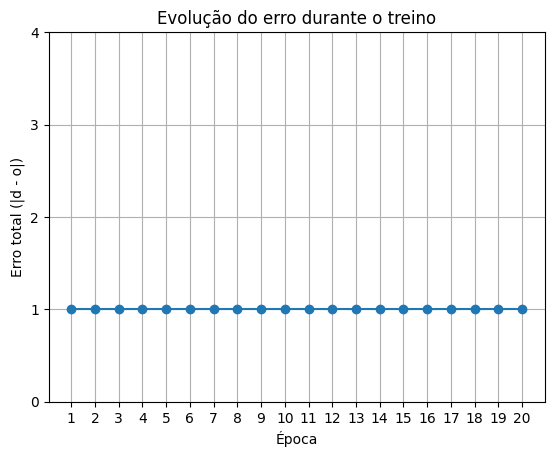

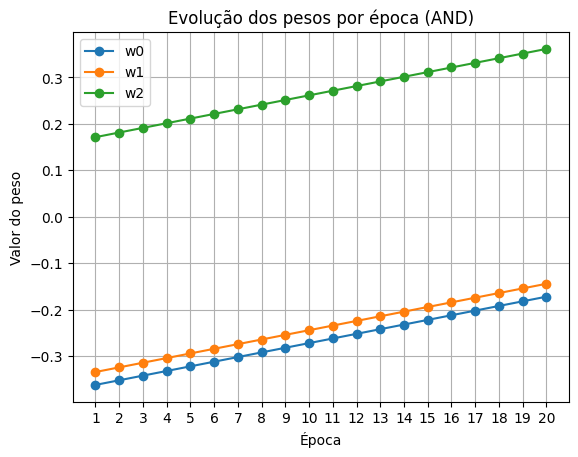

In [ ]:
# Taxa de aprendizagem
alphaAnd = 1e-3

w0 = random.uniform(-0.5, 0.5)
w1 = random.uniform(-0.5, 0.5)
w2 = random.uniform(-0.5, 0.5)

# Número de épocas
epocas = 20
e = []
w_hist = []

for epoca in range(epocas):
    total_erro = 0
    #print(f"\nÉpoca {epoca+1}")
    
    w_hist.append((w0, w1, w2))
    #print(f"Weights: w0={w0}, w1={w1}, w2={w2}")

    for i, input in enumerate(X):
        s = w0 + w1 * input[0] + w2 * input[1]
        #print(f"Resultado pré f():{s}")
        y = f(s)
        #print(f"Resultado:{y}")

        # Cálculo do erro
        erro = out_and[i] - y
        #print(f"out_and:{out_and[i]}    y:{y}    Erro:{erro}")
        
        total_erro += abs(erro)

        # Atualização dos pesos
        w0 = w0 + alphaAnd * erro
        w1 = w1 + alphaAnd * erro * input[0]
        w2 = w2 + alphaAnd * erro * input[1]
        
    e.append(total_erro)
    

    #print(f"Erro total nesta época: {total_erro}")
    if total_erro == 0:
        print("Rede aprendeu o padrão completo!"+ str(epoca+1))

        break

#print("\nPesos finais:")
#print(f"w0 = {w0:.5f}, w1 = {w1:.5f}, w2 = {w2:.5f}")

#(a) Plot erro por época

plt.plot(range(1, len(e) + 1), e, marker='o')
plt.xticks(range(1, epocas + 1, 1))
plt.yticks(range(5))
plt.xlabel("Época")
plt.ylabel("Erro total (|d - o|)")
plt.title("Evolução do erro durante o treino")
plt.grid(True)
plt.show()

#(b) Plot pesos por época
w0_list = [w[0] for w in w_hist]
w1_list = [w[1] for w in w_hist]
w2_list = [w[2] for w in w_hist]

plt.plot(range(1, len(w0_list)+1), w0_list, label='w0', marker='o')
plt.plot(range(1, len(w1_list)+1), w1_list, label='w1', marker='o')
plt.plot(range(1, len(w2_list)+1), w2_list, label='w2', marker='o')
plt.xticks(range(1, epocas + 1, 1))
plt.title("Evolução dos pesos por época (AND)")
plt.xlabel("Época")
plt.ylabel("Valor do peso")
plt.legend()
plt.grid(True)
plt.show()


### 6)(c)

Aumentar o parametro α aumenta a velocidade de convergência como seria de esperar, mas um aumento muito elevado resulta em instablidade dos valores dos pesos.
Ao testarmos alguns valores do α manualmente, concluímos que 1e-1 parece-nos que é aproximadamente o melhor valor, pois confere uma convergência rápida e uma boa establidade nos valores de erro.

### 6)(d)

In [164]:
def treinar(alphaAnd=1e-3, epocas=20):
    w0 = random.uniform(-0.5, 0.5)
    w1 = random.uniform(-0.5, 0.5)
    w2 = random.uniform(-0.5, 0.5)

    e = []
    w_hist = []

    for epoca in range(epocas):
        total_erro = 0
        #print(f"\nÉpoca {epoca+1}")
        
        w_hist.append((w0, w1, w2))
        #print(f"Weights: w0={w0}, w1={w1}, w2={w2}")

        for i, input in enumerate(X):
            s = w0 + w1 * input[0] + w2 * input[1]
            #print(f"Resultado pré f():{s}")
            y = f(s)
            #print(f"Resultado:{y}")

            # Cálculo do erro
            erro = out_and[i] - y
            #print(f"out_and:{out_and[i]}    y:{y}    Erro:{erro}")
            
            total_erro += abs(erro)

            # Atualização dos pesos
            w0 = w0 + alphaAnd * erro
            w1 = w1 + alphaAnd * erro * input[0]
            w2 = w2 + alphaAnd * erro * input[1]
            
        e.append(total_erro)
        

        #print(f"Erro total nesta época: {total_erro}")
        if total_erro == 0:
            print("Rede aprendeu o padrão completo!"+ str(epoca+1))
            return epoca + 1, w0, w1, w2
            

    print("\nPesos finais:")    
    print(f"w0 = {w0:.5f}, w1 = {w1:.5f}, w2 = {w2:.5f}")
    return epocas,w0, w1, w2



Pesos finais:
w0 = 0.39181, w1 = 0.28725, w2 = -0.17244
Rede aprendeu o padrão completo!4

Pesos finais:
w0 = -0.02823, w1 = -0.26788, w2 = -0.02001

Pesos finais:
w0 = -0.06823, w1 = 0.05532, w2 = 0.24188
Rede aprendeu o padrão completo!4
Rede aprendeu o padrão completo!14

Pesos finais:
w0 = -0.17192, w1 = 0.57175, w2 = -0.01589

Pesos finais:
w0 = 0.36881, w1 = 0.13294, w2 = -0.14998
Rede aprendeu o padrão completo!15

Pesos finais:
w0 = 0.38979, w1 = -0.07795, w2 = -0.03408
Rede aprendeu o padrão completo!1

Pesos finais:
w0 = 0.09235, w1 = -0.20763, w2 = 0.05550

Pesos finais:
w0 = 0.09948, w1 = -0.05465, w2 = 0.44952

Pesos finais:
w0 = 0.21733, w1 = -0.22038, w2 = -0.05738

Pesos finais:
w0 = -0.12992, w1 = 0.15209, w2 = -0.28888
Rede aprendeu o padrão completo!7

Pesos finais:
w0 = 0.24103, w1 = -0.03267, w2 = 0.30673

Pesos finais:
w0 = 0.09031, w1 = 0.47821, w2 = -0.04171
Rede aprendeu o padrão completo!5
Rede aprendeu o padrão completo!13

Pesos finais:
w0 = 0.33432, w1 = -

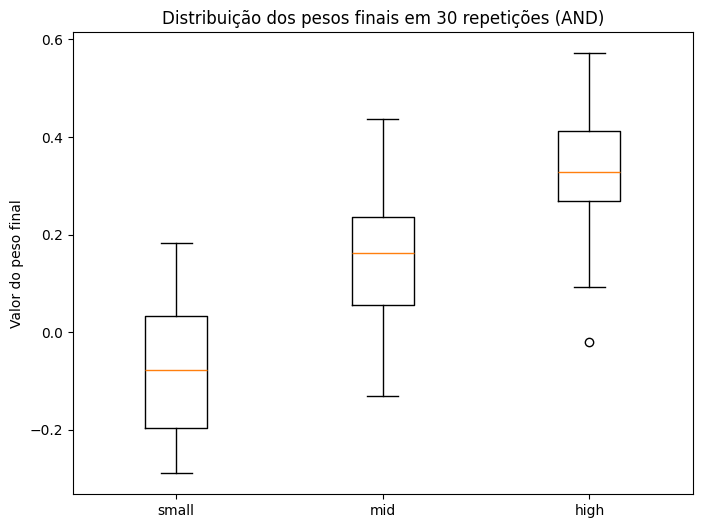

In [165]:
# Repetições
repeticoes = 30
resultados = []
small_finais=[]
mid_finais=[]
high_finais=[]
for _ in range(repeticoes):
    epocas,w0,w1,w2 = treinar(alphaAnd, 20)
    #print(f"Convergência em {epocas} épocas.")
    resultados.append(epocas)
    aux = [w0, w1, w2]
    aux.sort()
    small_finais.append(aux[0])
    mid_finais.append(aux[1])
    high_finais.append(aux[2])

# Média e desvio-padrão
media = sum(resultados) / len(resultados)
variancia = sum((x - media)**2 for x in resultados) / len(resultados)
dp = math.sqrt(variancia)

#print("\nResultados das 20 execuções:", resultados)
print(f"Média de épocas até convergência: {media:.2f}")
print(f"Desvio-padrão: {dp:.2f}")

# boxplot dos pesos finais
plt.figure(figsize=(8,6))
plt.boxplot([small_finais, mid_finais, high_finais],
            tick_labels=['small', 'mid', 'high'])
plt.title("Distribuição dos pesos finais em 30 repetições (AND)")
plt.ylabel("Valor do peso final")
plt.show()

### 7)

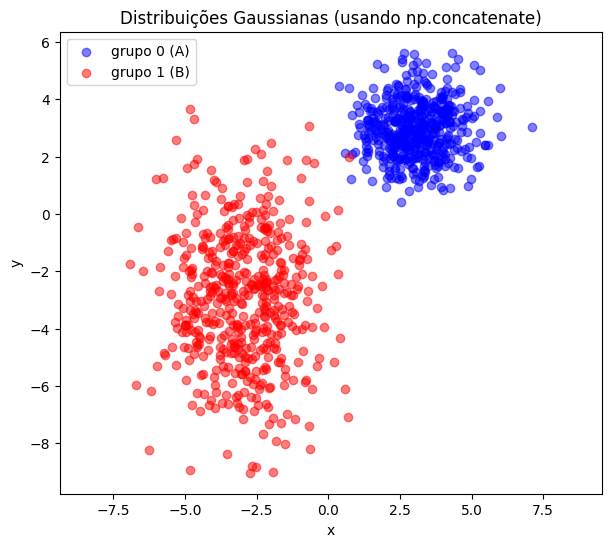

Forma final de c: (1000, 3)
Primeiras 5 linhas:
 [[-3.57410432 -6.31053373  1.        ]
 [-3.46389536 -1.7064726   1.        ]
 [ 2.86693602  3.37254699  0.        ]
 [ 3.20448396  2.96212957  0.        ]
 [ 2.74943892  3.34575337  0.        ]]


In [166]:
import numpy as np
import matplotlib.pyplot as plt

# Conjunto A
mean1 = [3, 3]
cov1 = [[1, 0], [0, 1]]
a = np.random.multivariate_normal(mean1, cov1, 500).T

# Conjunto B
mean2 = [-3, -3]
cov2 = [[2, 0], [0, 5]]
b = np.random.multivariate_normal(mean2, cov2, 500).T

a_labels = np.zeros((1, a.shape[1]))   # (1, 500)
b_labels = np.ones((1, b.shape[1]))    # (1, 500)


a_full = np.concatenate((a, a_labels), axis=0)  # (3, 500)
b_full = np.concatenate((b, b_labels), axis=0)  # (3, 500)

c = np.concatenate((a_full, b_full), axis=1)
c = c.T

np.random.shuffle(c)

# Separar coordenadas para plot
x = c[:, 0]
y = c[:, 1]
labels = c[:, 2]

alpha = 1e-2

plt.figure(figsize=(7,6))
plt.scatter(x[labels==0], y[labels==0], color='blue', alpha=0.5, label='grupo 0 (A)')
plt.scatter(x[labels==1], y[labels==1], color='red', alpha=0.5, label='grupo 1 (B)')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distribuições Gaussianas (usando np.concatenate)')
plt.legend()
plt.show()
print("Forma final de c:", c.shape)
print("Primeiras 5 linhas:\n", c[:5])


### 8)

Época 1: erro final = 2.0
Época 2: erro final = 3.0
Época 3: erro final = 1.0
Época 4: erro final = 1.0
Época 5: erro final = 2.0
Época 6: erro final = 3.0
Época 7: erro final = 1.0
Época 8: erro final = 1.0
Época 9: erro final = 2.0
Época 10: erro final = 2.0
Época 11: erro final = 2.0
Época 12: erro final = 2.0
Época 13: erro final = 1.0
Época 14: erro final = 1.0
Época 15: erro final = 1.0
Época 16: erro final = 1.0
Época 17: erro final = 1.0
Época 18: erro final = 1.0
Época 19: erro final = 1.0
Época 20: erro final = 1.0
[np.float64(2.0), np.float64(3.0), np.float64(1.0), np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(1.0), np.float64(1.0), np.float64(2.0), np.float64(2.0), np.float64(2.0), np.float64(2.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0)]--- FINAL ---


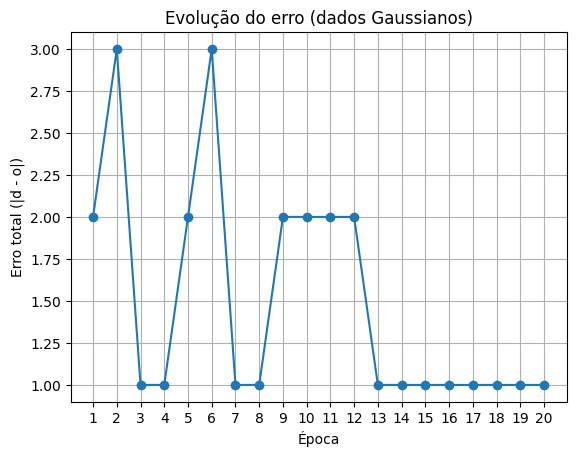

Classes verdadeiras (d): (array([0., 1.]), array([500, 500]))
Classes preditas (Y_pred): (array([0, 1]), array([501, 499]))
Pontos da 1ª dist (label 0) classificados como 1: []
Pontos da 2ª dist (label 1) classificados como 0: [[0.73495072 2.00076156]]


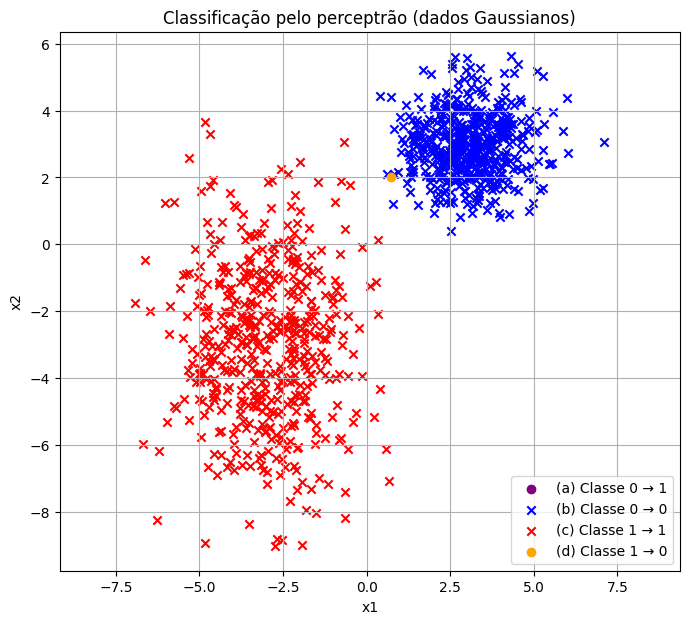

In [167]:
X = c[:, 0:2]   # coordenadas (x1, x2)
d = c[:, 2]     # labels (0 ou 1)

def f(s):
    return 1 if s >= 0 else 0

def treinar(X, d, alpha, epocas):
    w0 = random.uniform(-0.5, 0.5)
    w1 = random.uniform(-0.5, 0.5)
    w2 = random.uniform(-0.5, 0.5)
    
    e = []          # histórico de erro (erro final de cada época)
    w_hist = []     # histórico de pesos

    for epoca in range(epocas):
        w_hist.append((w0, w1, w2))
        
        # Atualização dos pesos para todos os exemplos
        for i, entrada in enumerate(X):
            s = w0 + w1 * entrada[0] + w2 * entrada[1]
            y = f(s)
            erro = d[i] - y

            # atualização dos pesos
            w0 += alpha * erro
            w1 += alpha * erro * entrada[0]
            w2 += alpha * erro * entrada[1]

        # cálculo do erro após os pesos da época estarem atualizados 
        Y_pred_epoca = np.array([f(w0 + w1*x1 + w2*x2) for x1, x2 in X])
        erro_epoca = np.sum(np.abs(d - Y_pred_epoca))  # número de classificações erradas
        e.append(erro_epoca)

        print(f"Época {epoca+1}: erro final = {erro_epoca}")

        if erro_epoca == 0:
            print("Rede aprendeu completamente na época", epoca + 1)
            break

    return w0, w1, w2, e, w_hist



# Treinar o perceptrão 
w0, w1, w2, e, w_hist = treinar(X,d, alpha, epocas=20)
print(str(e)+"--- FINAL ---")
# Plot
plt.plot(range(1, len(e)+1), e, marker='o')
plt.xlabel("Época")
plt.ylabel("Erro total (|d - o|)")
plt.title("Evolução do erro (dados Gaussianos)")
plt.xticks(range(1, len(e)+1))
plt.grid(True)
plt.show()

# Classificar os pontos
Y_pred = []
for entrada in X:
    s = w0 + w1 * entrada[0] + w2 * entrada[1]
    Y_pred.append(f(s))
Y_pred = np.array(Y_pred)

print("Classes verdadeiras (d):", np.unique(d, return_counts=True))
print("Classes preditas (Y_pred):", np.unique(Y_pred, return_counts=True))


# (a) Pontos da 1ª dist (label 0) classificados como 1
a_class1 = X[(d == 0) & (Y_pred == 1)]
print("Pontos da 1ª dist (label 0) classificados como 1:", a_class1)
# (b) Pontos da 1ª dist (label 0) classificados como 0
a_class0 = X[(d == 0) & (Y_pred == 0)]
# (c) Pontos da 2ª dist (label 1) classificados como 1
b_class1 = X[(d == 1) & (Y_pred == 1)]
# (d) Pontos da 2ª dist (label 1) classificados como 0
b_class0 = X[(d == 1) & (Y_pred == 0)]
print("Pontos da 2ª dist (label 1) classificados como 0:", b_class0)

#  Gráfico colorido 4 grupos
plt.figure(figsize=(8,7))
plt.scatter(a_class1[:,0], a_class1[:,1], color='purple', marker='o', label='(a) Classe 0 → 1')
plt.scatter(a_class0[:,0], a_class0[:,1], color='blue', marker='x', label='(b) Classe 0 → 0')
plt.scatter(b_class1[:,0], b_class1[:,1], color='red', marker='x', label='(c) Classe 1 → 1')
plt.scatter(b_class0[:,0], b_class0[:,1], color='orange', marker='o', label='(d) Classe 1 → 0')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Classificação pelo perceptrão (dados Gaussianos)")
plt.axis("equal")
plt.legend()
plt.grid(True)
plt.show()

In [168]:
TP = np.sum((d == 1) & (Y_pred == 1))
TN = np.sum((d == 0) & (Y_pred == 0))
FP = np.sum((d == 0) & (Y_pred == 1))
FN = np.sum((d == 1) & (Y_pred == 0))
print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")
matriz_confusao = np.array([[TN, FP], [FN, TP]])

TP: 499, TN: 500, FP: 0, FN: 1


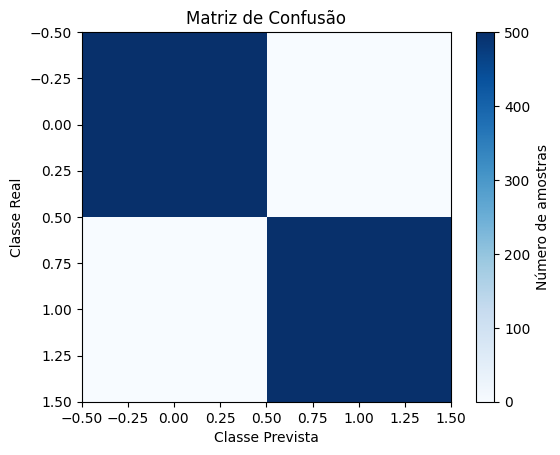

In [169]:
# Impressão visual
plt.imshow(matriz_confusao, cmap='Blues')
plt.title("Matriz de Confusão")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.colorbar(label="Número de amostras")
plt.show()

TP: 499, TN: 500, FP: 0, FN: 1
0.999


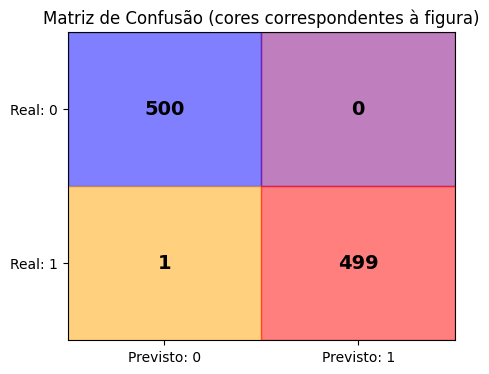

Matriz de confusão:
[[500   0]
 [  1 499]]


In [170]:

def calcular_metricas(d, Y_pred):
    TP = np.sum((d == 1) & (Y_pred == 1))
    TN = np.sum((d == 0) & (Y_pred == 0))
    FP = np.sum((d == 0) & (Y_pred == 1))
    FN = np.sum((d == 1) & (Y_pred == 0))
    print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")
    acc = (TP + TN) / len(d)
    print(acc)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    #print(f"Acurácia: {acc:.4f}")
    return acc, precision, recall, f1

#correr a função
calcular_metricas(d, Y_pred)

matriz_confusao = np.array([[TN, FP],
                            [FN, TP]])

# Cores correspondentes à tua figura
cores = np.array([["#0000FF", "#800080"],   # azul, roxo
                  ["#FFA500", "#FF0000"]])  # laranja, vermelho

# Criar gráfico
fig, ax = plt.subplots(figsize=(5, 4))
for i in range(2):
    for j in range(2):
        ax.add_patch(plt.Rectangle((j, i), 1, 1, color=cores[i, j], alpha=0.5 ))

# Adicionar valores numéricos
for i in range(2):
    for j in range(2):
        ax.text(j + 0.5, i + 0.5, str(matriz_confusao[i, j]),
                va='center', ha='center', fontsize=14, color='black', weight='bold')

# Ajustes de eixos
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_xticks([0.5, 1.5])
ax.set_yticks([0.5, 1.5])
ax.set_xticklabels(['Previsto: 0', 'Previsto: 1'])
ax.set_yticklabels(['Real: 0', 'Real: 1'])
ax.set_title("Matriz de Confusão (cores correspondentes à figura)")
plt.gca().invert_yaxis()
plt.grid(False)
plt.show()

print("Matriz de confusão:")
print(matriz_confusao)

In [171]:
def treinarv2(X, d, alpha=1e-3, epocas=20):
    w0 = random.uniform(-0.5, 0.5)
    w1 = random.uniform(-0.5, 0.5)
    w2 = random.uniform(-0.5, 0.5)

    for _ in range(epocas):
        total_erro = 0
        for i, entrada in enumerate(X):
            s = w0 + w1 * entrada[0] + w2 * entrada[1]
            y = f(s)
            erro = d[i] - y
            #total_erro += abs(erro)
            w0 += alpha * erro
            w1 += alpha * erro * entrada[0]
            w2 += alpha * erro * entrada[1]

            # Verificar erro após a atualização completa
        Y_pred = np.array([f(w0 + w1*x1 + w2*x2) for x1, x2 in X])
        total_erro = np.sum(np.abs(d - Y_pred))
        if total_erro == 0:
            print(" Rede aprendeu completamente!")
            break
        print(f"Erro total nesta época: {total_erro}")
    #previsao final
    Y_pred = []
    for entrada in X:
        s = w0 + w1 * entrada[0] + w2 * entrada[1]
        Y_pred.append(f(s))
        #print(Y_pred)
    return np.array(Y_pred)

n_testes = 30
accs, precs, recs, f1s = [], [], [], []

for _ in range(n_testes):
    #print(Y_pred)
    Y_pred = treinarv2(X, d, alpha, epocas=20)
    acc, prec, rec, f1 = calcular_metricas(d, Y_pred)
    accs.append(acc)
    precs.append(prec)
    recs.append(rec)
    f1s.append(f1)


# Calcular as médias
acc_med = np.mean(accs)
prec_med = np.mean(precs)
rec_med = np.mean(recs)
f1_med = np.mean(f1s)
print (f"Médias após {n_testes} testes:")
print(f"Accuracy: {acc_med:.10f}")           
print(f"Precision: {prec_med:.10f}")
print(f"Recall: {rec_med:.10f}")
print(f"F1-Score: {f1_med:.10f}")

Erro total nesta época: 4.0
Erro total nesta época: 2.0
Erro total nesta época: 2.0
Erro total nesta época: 1.0
Erro total nesta época: 1.0
Erro total nesta época: 1.0
Erro total nesta época: 1.0
Erro total nesta época: 1.0
Erro total nesta época: 1.0
Erro total nesta época: 3.0
Erro total nesta época: 1.0
Erro total nesta época: 1.0
Erro total nesta época: 1.0
Erro total nesta época: 3.0
Erro total nesta época: 1.0
Erro total nesta época: 1.0
Erro total nesta época: 2.0
Erro total nesta época: 1.0
Erro total nesta época: 1.0
Erro total nesta época: 1.0
TP: 499, TN: 500, FP: 0, FN: 1
0.999
Erro total nesta época: 2.0
Erro total nesta época: 2.0
Erro total nesta época: 1.0
Erro total nesta época: 2.0
Erro total nesta época: 2.0
Erro total nesta época: 1.0
Erro total nesta época: 1.0
Erro total nesta época: 2.0
Erro total nesta época: 2.0
Erro total nesta época: 1.0
Erro total nesta época: 1.0
Erro total nesta época: 1.0
Erro total nesta época: 2.0
Erro total nesta época: 1.0
Erro total 